## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv(r'C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Clustering\crime_data.csv',index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


# Data Analysis

In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df[df.duplicated()]

,Murder,Assault,UrbanPop,Rape


<Axes: >

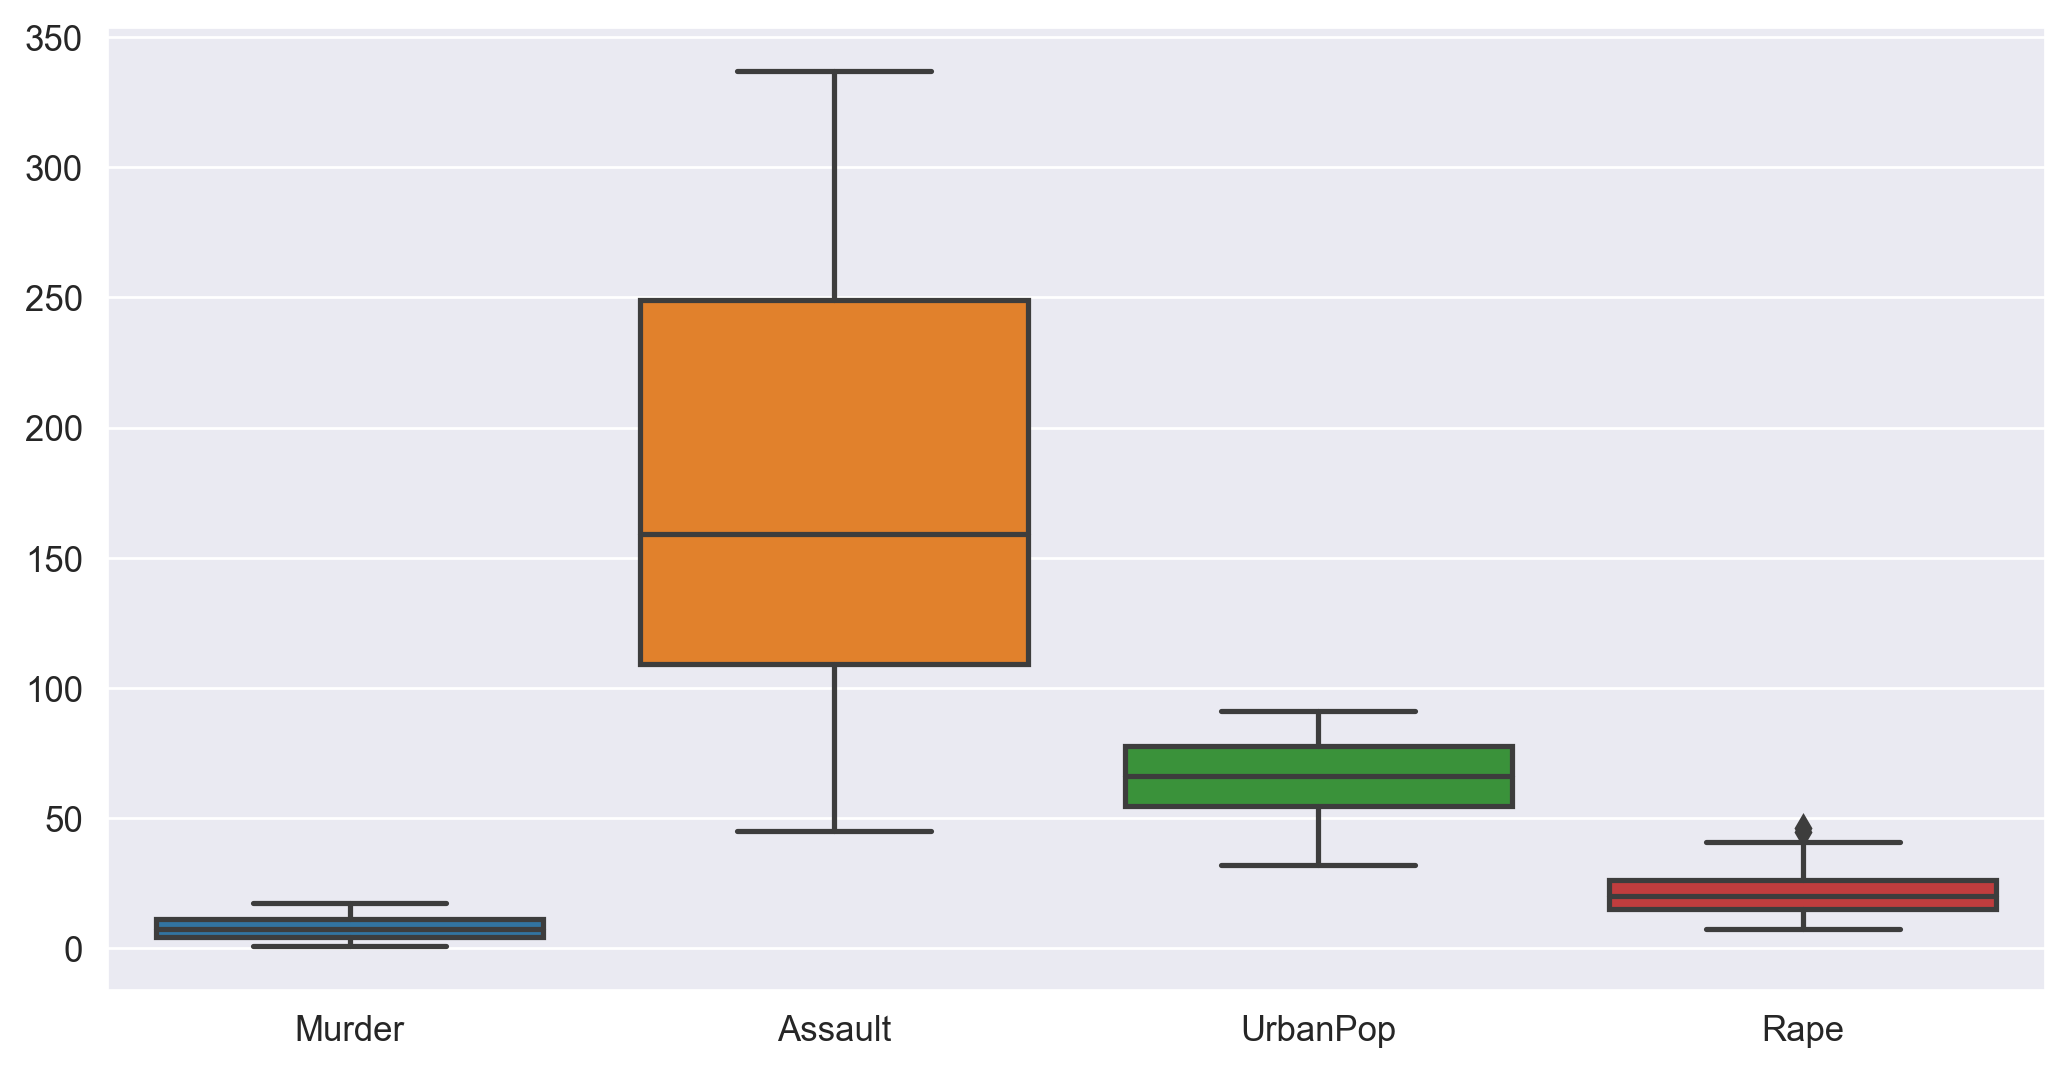

In [6]:
sns.boxplot(df)

In [7]:
rp = df['Rape'].sort_values(ascending=True)
rp

North Dakota       7.3
Maine              7.8
Rhode Island       8.3
West Virginia      9.3
New Hampshire      9.5
Wisconsin         10.8
Connecticut       11.1
Vermont           11.2
Iowa              11.3
South Dakota      12.8
Idaho             14.2
Minnesota         14.9
Pennsylvania      14.9
Wyoming           15.6
Delaware          15.8
North Carolina    16.1
Kentucky          16.3
Massachusetts     16.3
Montana           16.4
Nebraska          16.5
Mississippi       17.1
Kansas            18.0
New Jersey        18.8
Arkansas          19.5
Oklahoma          20.0
Hawaii            20.2
Virginia          20.7
Indiana           21.0
Alabama           21.2
Ohio              21.4
Louisiana         22.2
South Carolina    22.5
Utah              22.9
Illinois          24.0
Texas             25.5
Georgia           25.8
New York          26.1
Washington        26.2
Tennessee         26.9
Maryland          27.8
Missouri          28.2
Oregon            29.3
Arizona           31.0
Florida    

In [8]:
q1,q3 = np.percentile(df['Rape'],[25,75])
iqr = q3 - q1
lower_bound = q1*1.5
upper_bound = q3*1.5
print(lower_bound,upper_bound)

22.612499999999997 39.2625


In [9]:
df['Rape'].median()

20.1

In [10]:
df[df['Rape']>39]

,Murder,Assault,UrbanPop,Rape
Alaska,10.0,263,48,44.5
California,9.0,276,91,40.6
Nevada,12.2,252,81,46.0


In [11]:
df[df['Rape']>39] = 20

In [12]:
df[df['Rape']>39]

,Murder,Assault,UrbanPop,Rape


## Data Visualization

<Axes: >

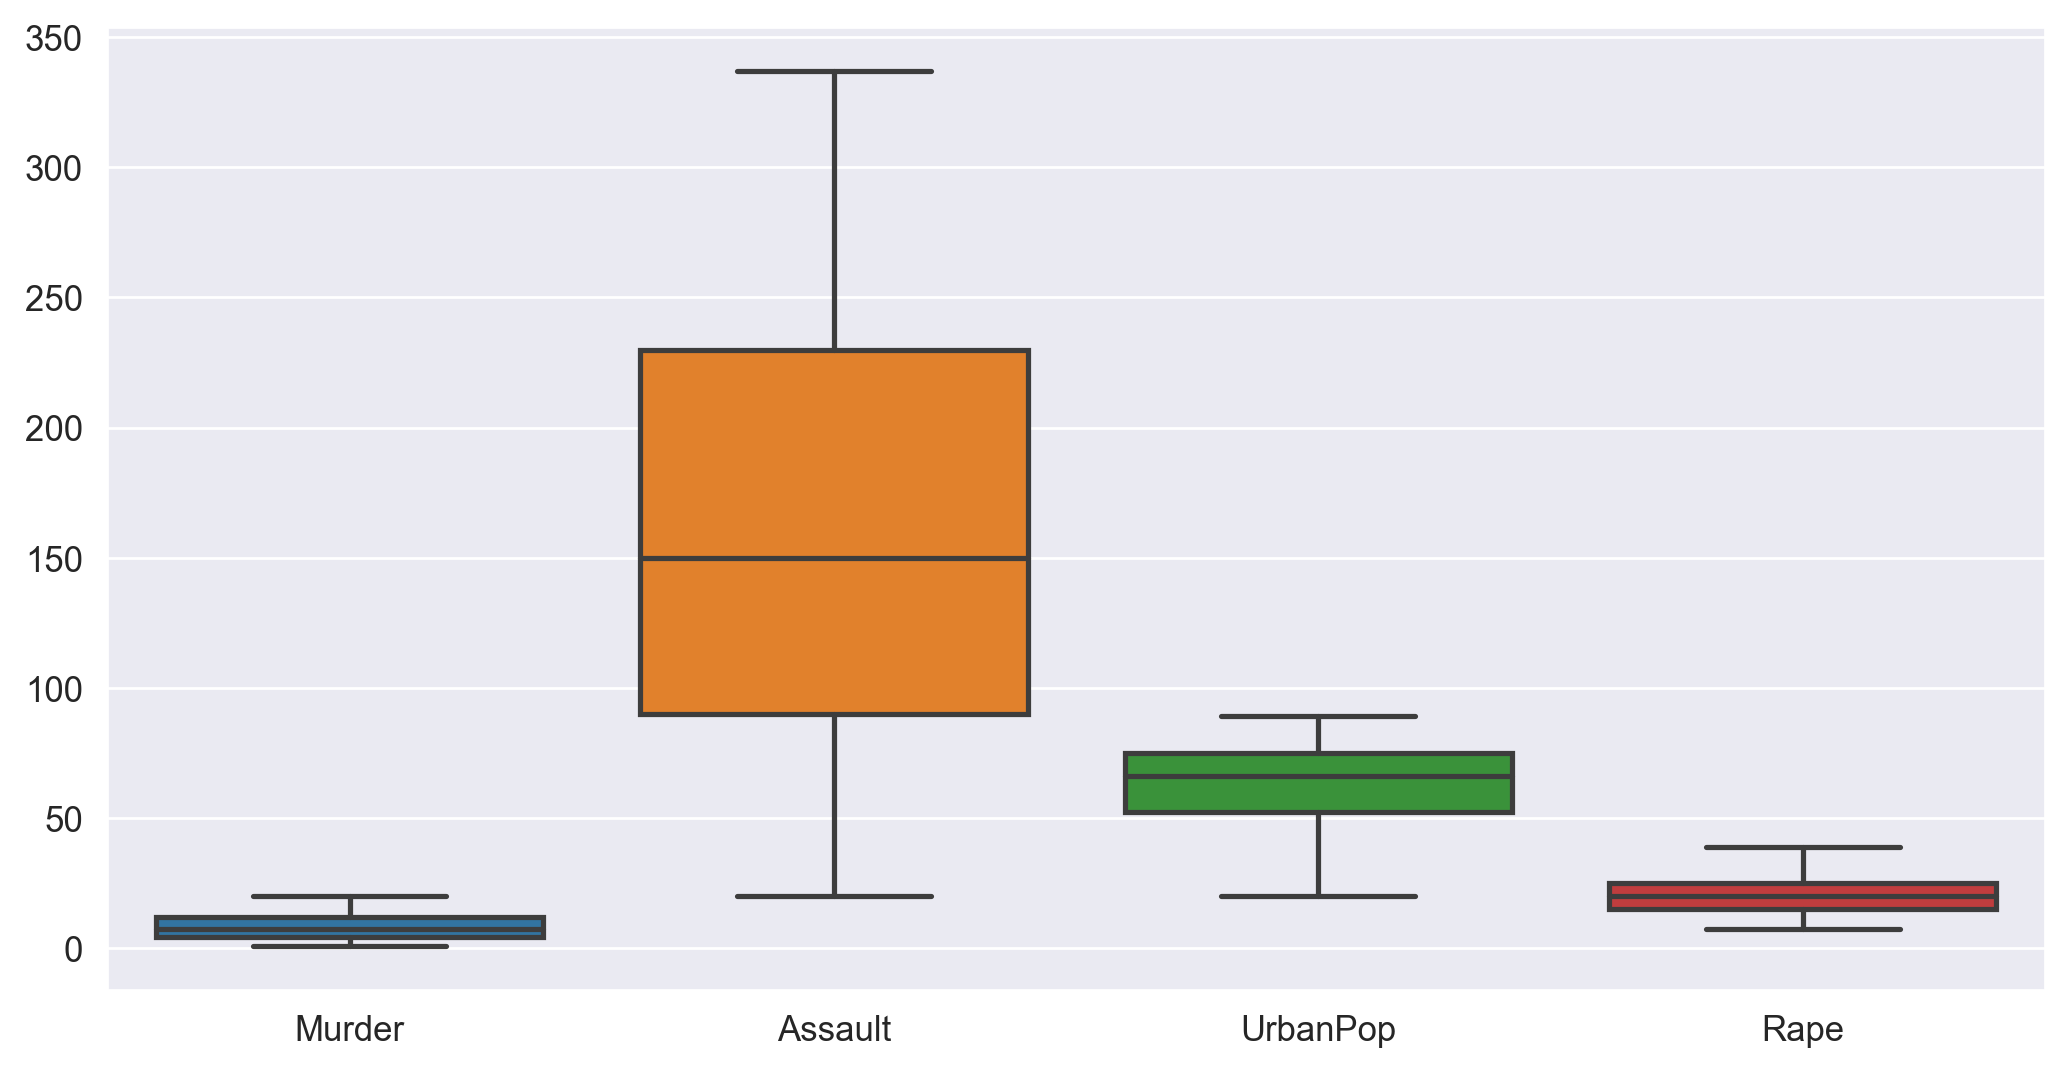

In [13]:
sns.boxplot(df)

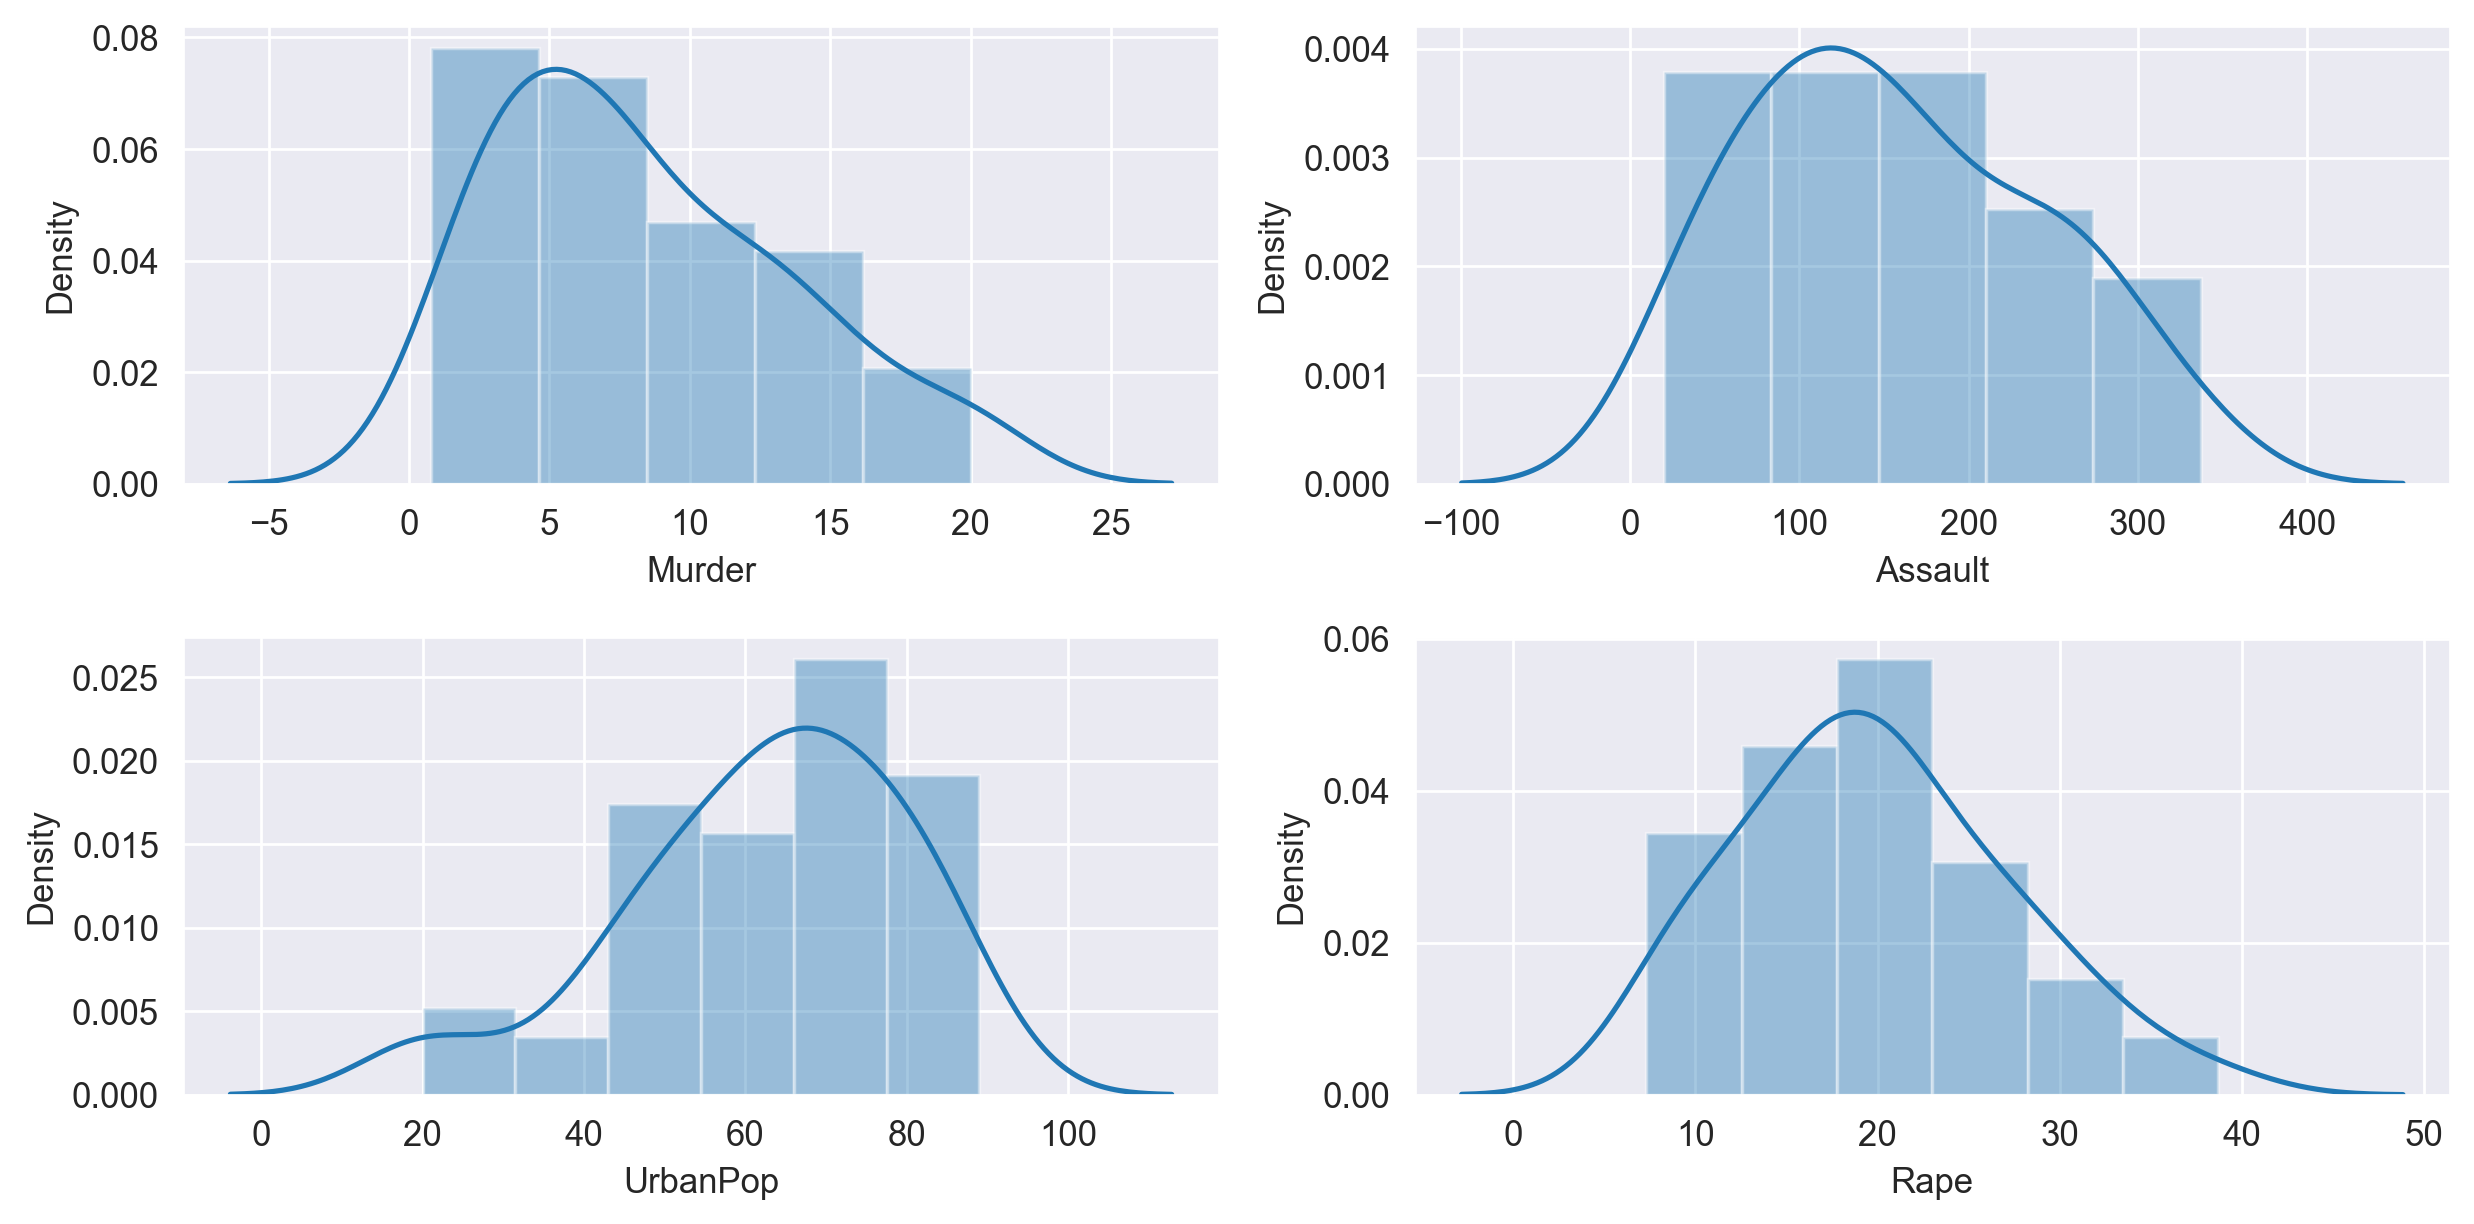

In [14]:
plt.subplot(2,2,1)
sns.distplot(df['Murder'])

plt.subplot(2,2,2)
sns.distplot(df['Assault'])

plt.subplot(2,2,3)
sns.distplot(df['UrbanPop'])

plt.subplot(2,2,4)
sns.distplot(df['Rape'])
plt.tight_layout()

## Standardization

In [15]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 9.36065583e-01,  9.26317955e-01, -2.52417576e-01,
         1.90136247e-01],
       [ 2.25228683e+00, -1.57912505e+00, -2.46252538e+00,
         2.59898466e-02],
       [-5.11003544e-02,  1.59907580e+00,  1.02711852e+00,
         1.53066518e+00],
       [ 8.43930096e-02,  3.92751390e-01, -7.17703429e-01,
        -4.24044866e-02],
       [ 2.25228683e+00, -1.57912505e+00, -2.46252538e+00,
         2.59898466e-02],
       [-8.98127441e-02,  5.55141214e-01,  9.10797059e-01,
         2.58393791e+00],
       [-9.80197708e-01, -5.35190464e-01,  8.52636327e-01,
        -1.19142929e+00],
       [-4.76936641e-01,  9.49516502e-01,  5.61832668e-01,
        -5.48522553e-01],
       [ 1.36190187e+00,  2.07464600e+00,  1.02711852e+00,
         1.65377498e+00],
       [ 1.74902577e+00,  6.36336126e-01, -1.36096112e-01,
         8.19364113e-01],
       [-5.93073810e-01, -1.27754395e+00,  1.20160072e+00,
         5.33475800e-02],
       [-1.11569107e+00, -4.19197732e-01, -4.85060502e-01,
      

# Building Hierarchy Clustering Model

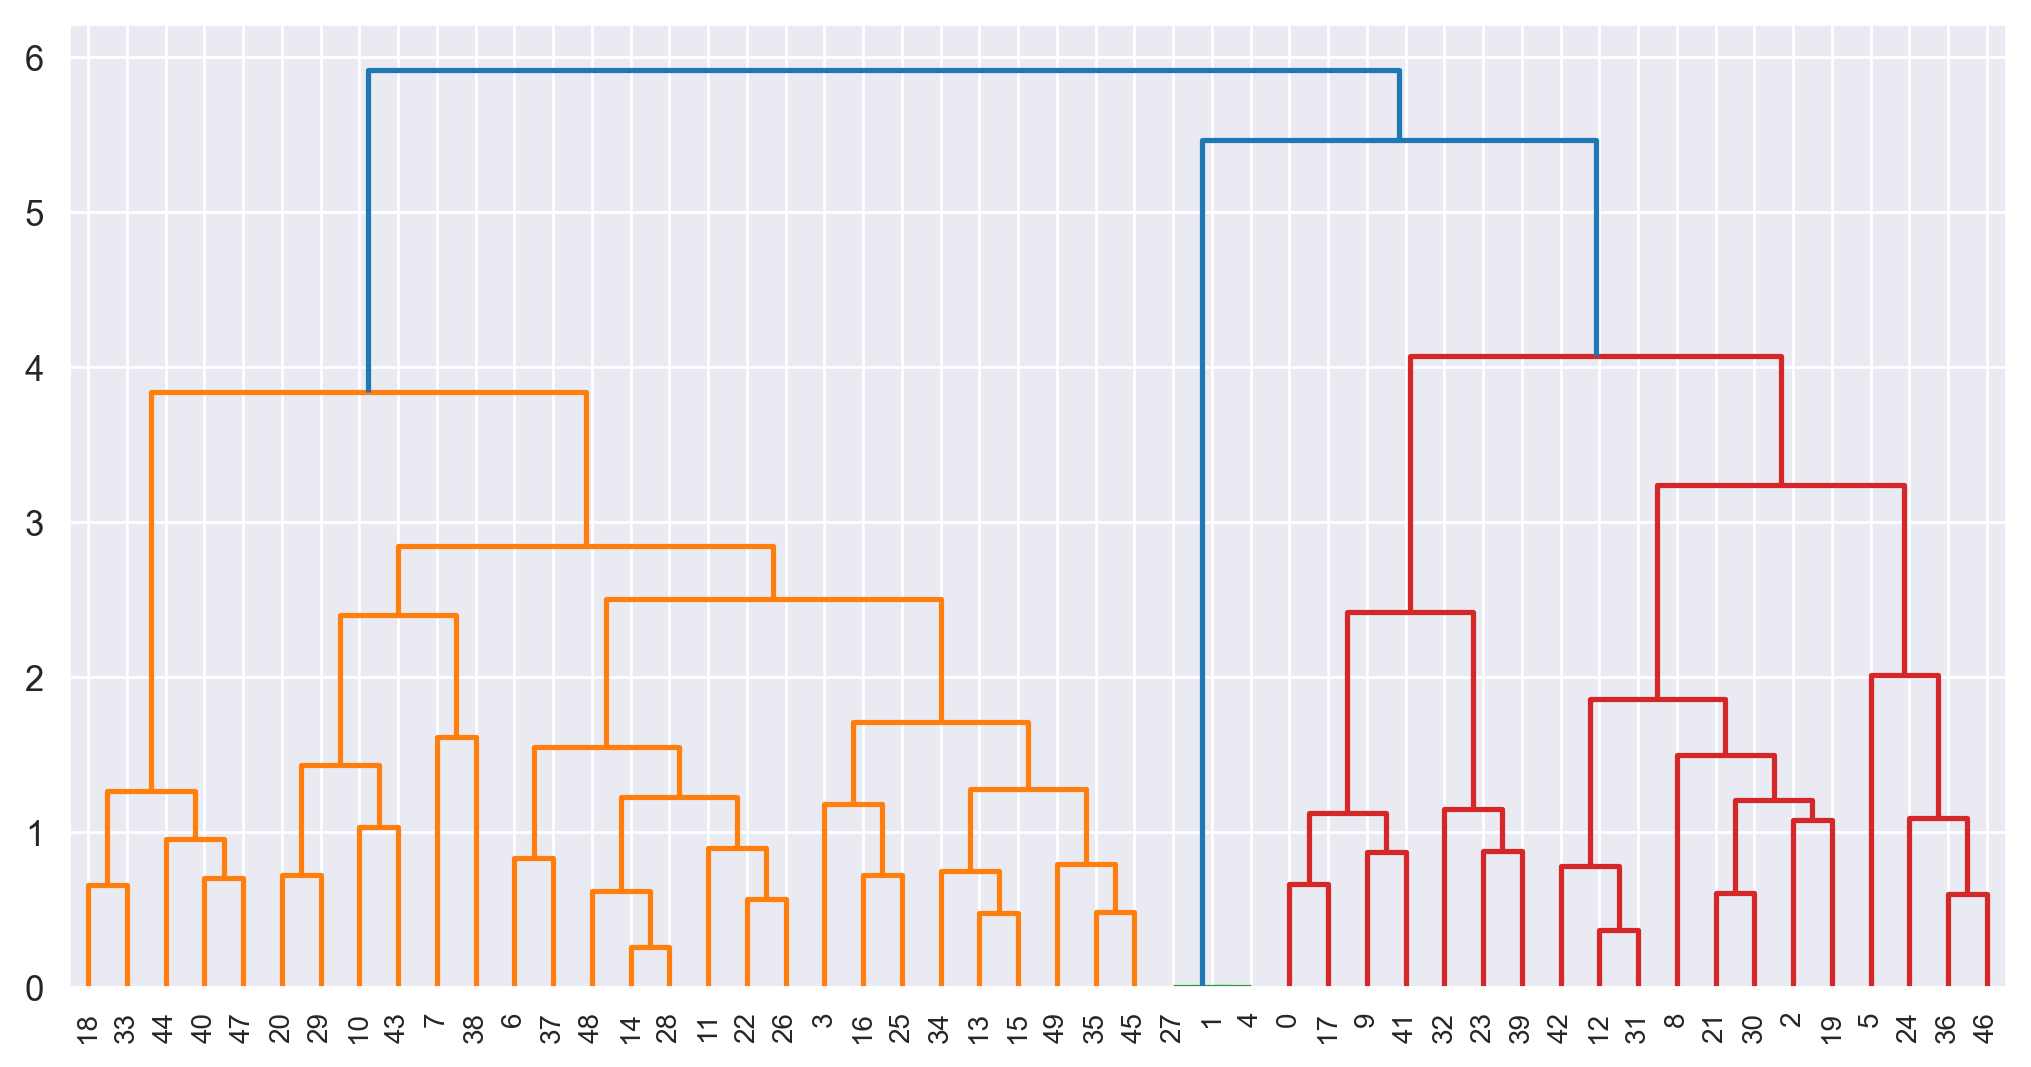

In [16]:
lk = hierarchy.linkage(x,method='complete')
dendogram = hierarchy.dendrogram(lk)

In [17]:
hc = AgglomerativeClustering(n_clusters=3)
y = hc.fit_predict(x)

In [18]:
y

array([1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
df['Cluster'] = y
df

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,1
Alaska,20.0,20,20,20.0,2
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,20.0,20,20,20.0,2
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1


In [20]:
df.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,4.900000,111.750000,63.178571,15.100000
1,11.631579,243.052632,67.789474,26.721053
2,20.000000,20.000000,20.000000,20.000000


In [21]:
hc_score = silhouette_score(x,y)

# Building K-Means Clustering Model

In [22]:
km = KMeans(n_clusters=4)
y = km.fit_predict(x)

In [23]:
km.cluster_centers_

array([[-0.46471168, -0.20980033,  0.49448866, -0.16983393],
       [ 0.79601782,  1.13237563,  0.30181999,  0.92879505],
       [ 2.25228683, -1.57912505, -2.46252538,  0.02598985],
       [-1.0417856 , -0.95698222, -0.64896802, -1.14914915]])

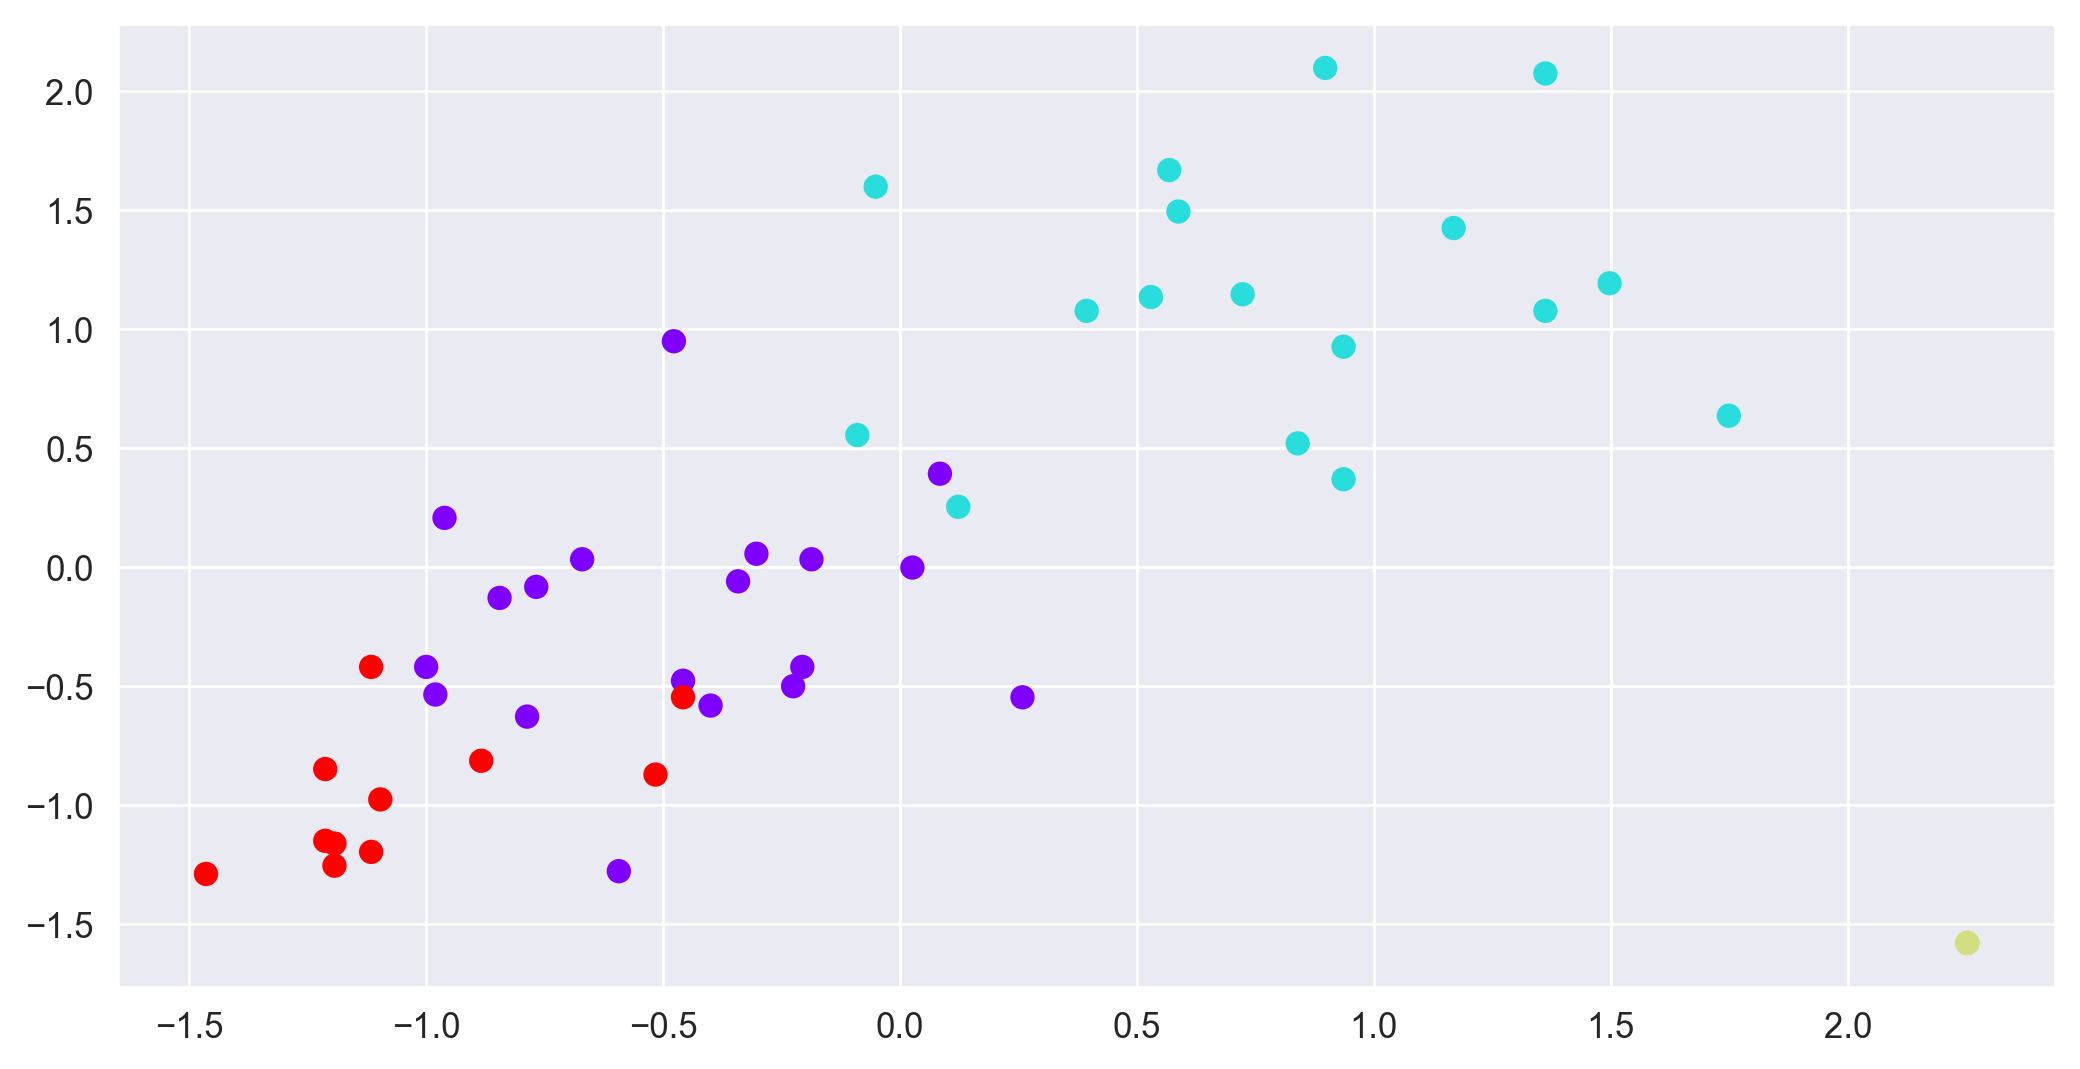

In [24]:
plt.scatter(x[:,0],x[:,1],c = y, cmap='rainbow')

In [25]:
km_score = silhouette_score(x,y)

## Elbow Graph

In [26]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [27]:
wcss

[200.0,
 125.48173614928153,
 80.54991973693303,
 59.01754913258823,
 43.744685854876266,
 37.79222406560018,
 32.61611630254248,
 29.7393879298634,
 26.469145991292798,
 23.763023703556684,
 20.53296445635373,
 18.902707313893373,
 17.238393208861222,
 16.088905964668985,
 15.521705925553967,
 13.989520554928713,
 12.544960553784476,
 12.025785979339418,
 10.955854472408312]

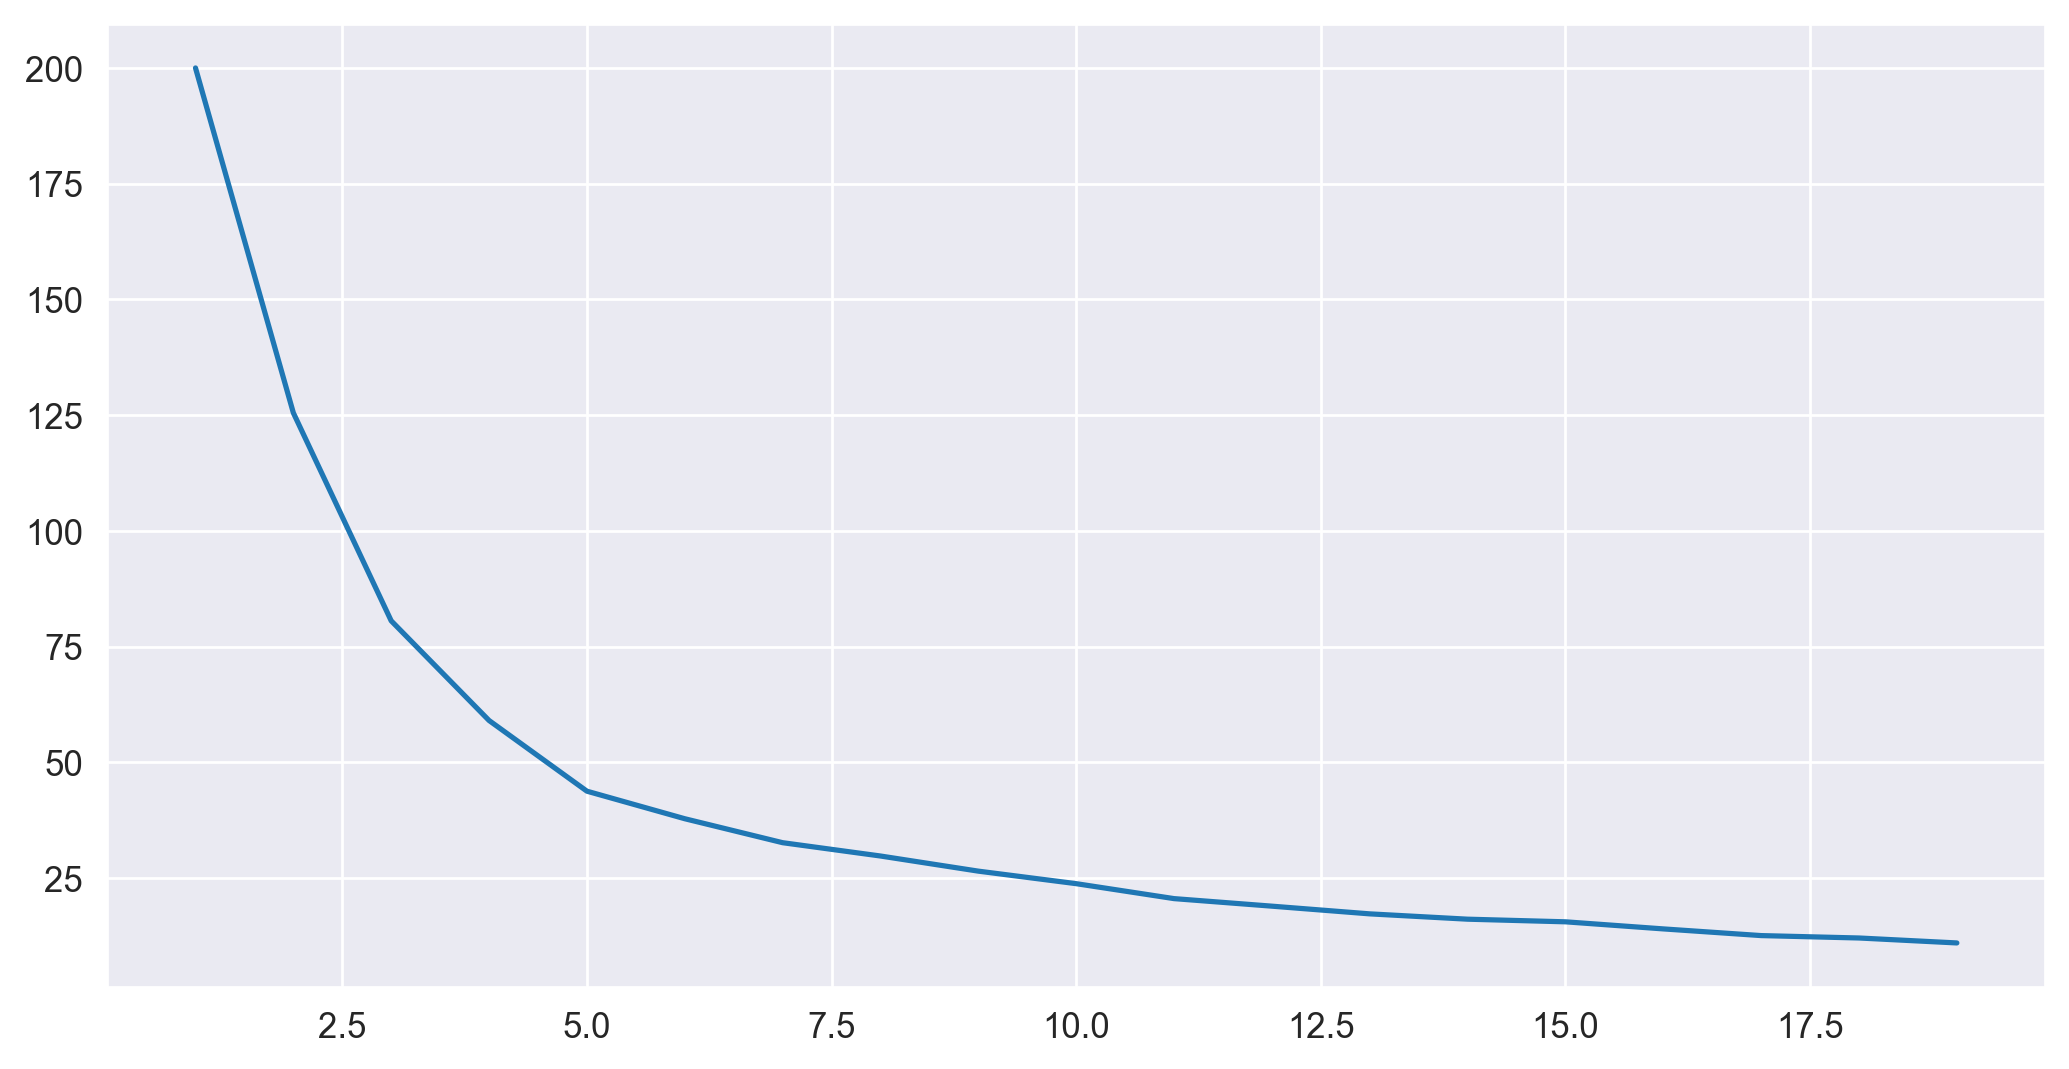

In [28]:
plt.plot(range(1,20),wcss)

In [29]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([0, 2, 3, 0, 2, 3, 4, 4, 3, 0, 4, 1, 3, 4, 1, 4, 1, 0, 1, 3, 4, 3,
       1, 0, 3, 1, 1, 2, 1, 4, 3, 3, 0, 1, 4, 4, 4, 4, 4, 0, 1, 0, 3, 4,
       1, 4, 4, 1, 1, 4])

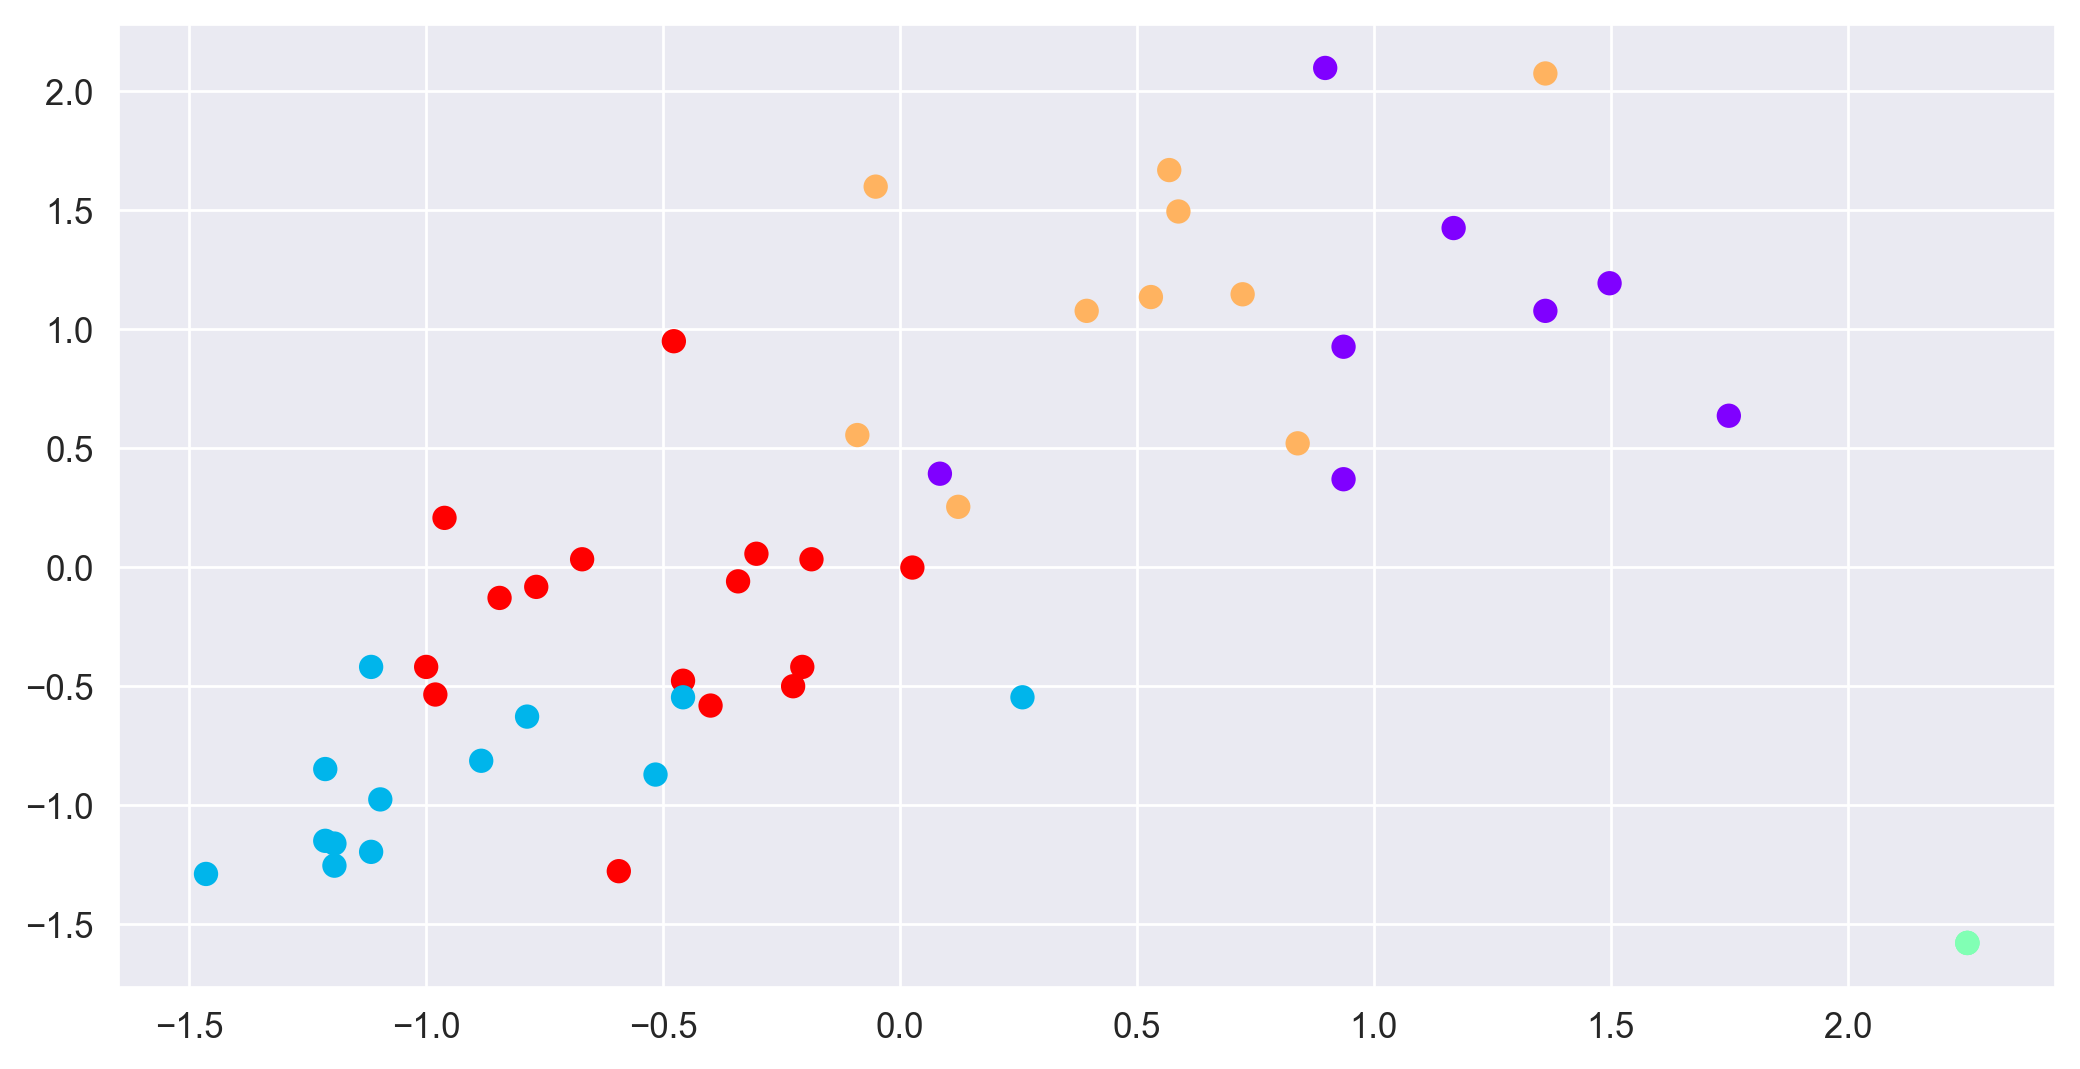

In [30]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')

In [31]:
km.cluster_centers_

array([[ 1.07881752,  1.01476241, -0.49960069,  0.21920384],
       [-0.92212912, -0.90012144, -0.59690806, -1.04411841],
       [ 2.25228683, -1.57912505, -2.46252538,  0.02598985],
       [ 0.49861558,  1.15250378,  0.84100418,  1.39934806],
       [-0.52411737, -0.20026145,  0.67088404, -0.14072134]])

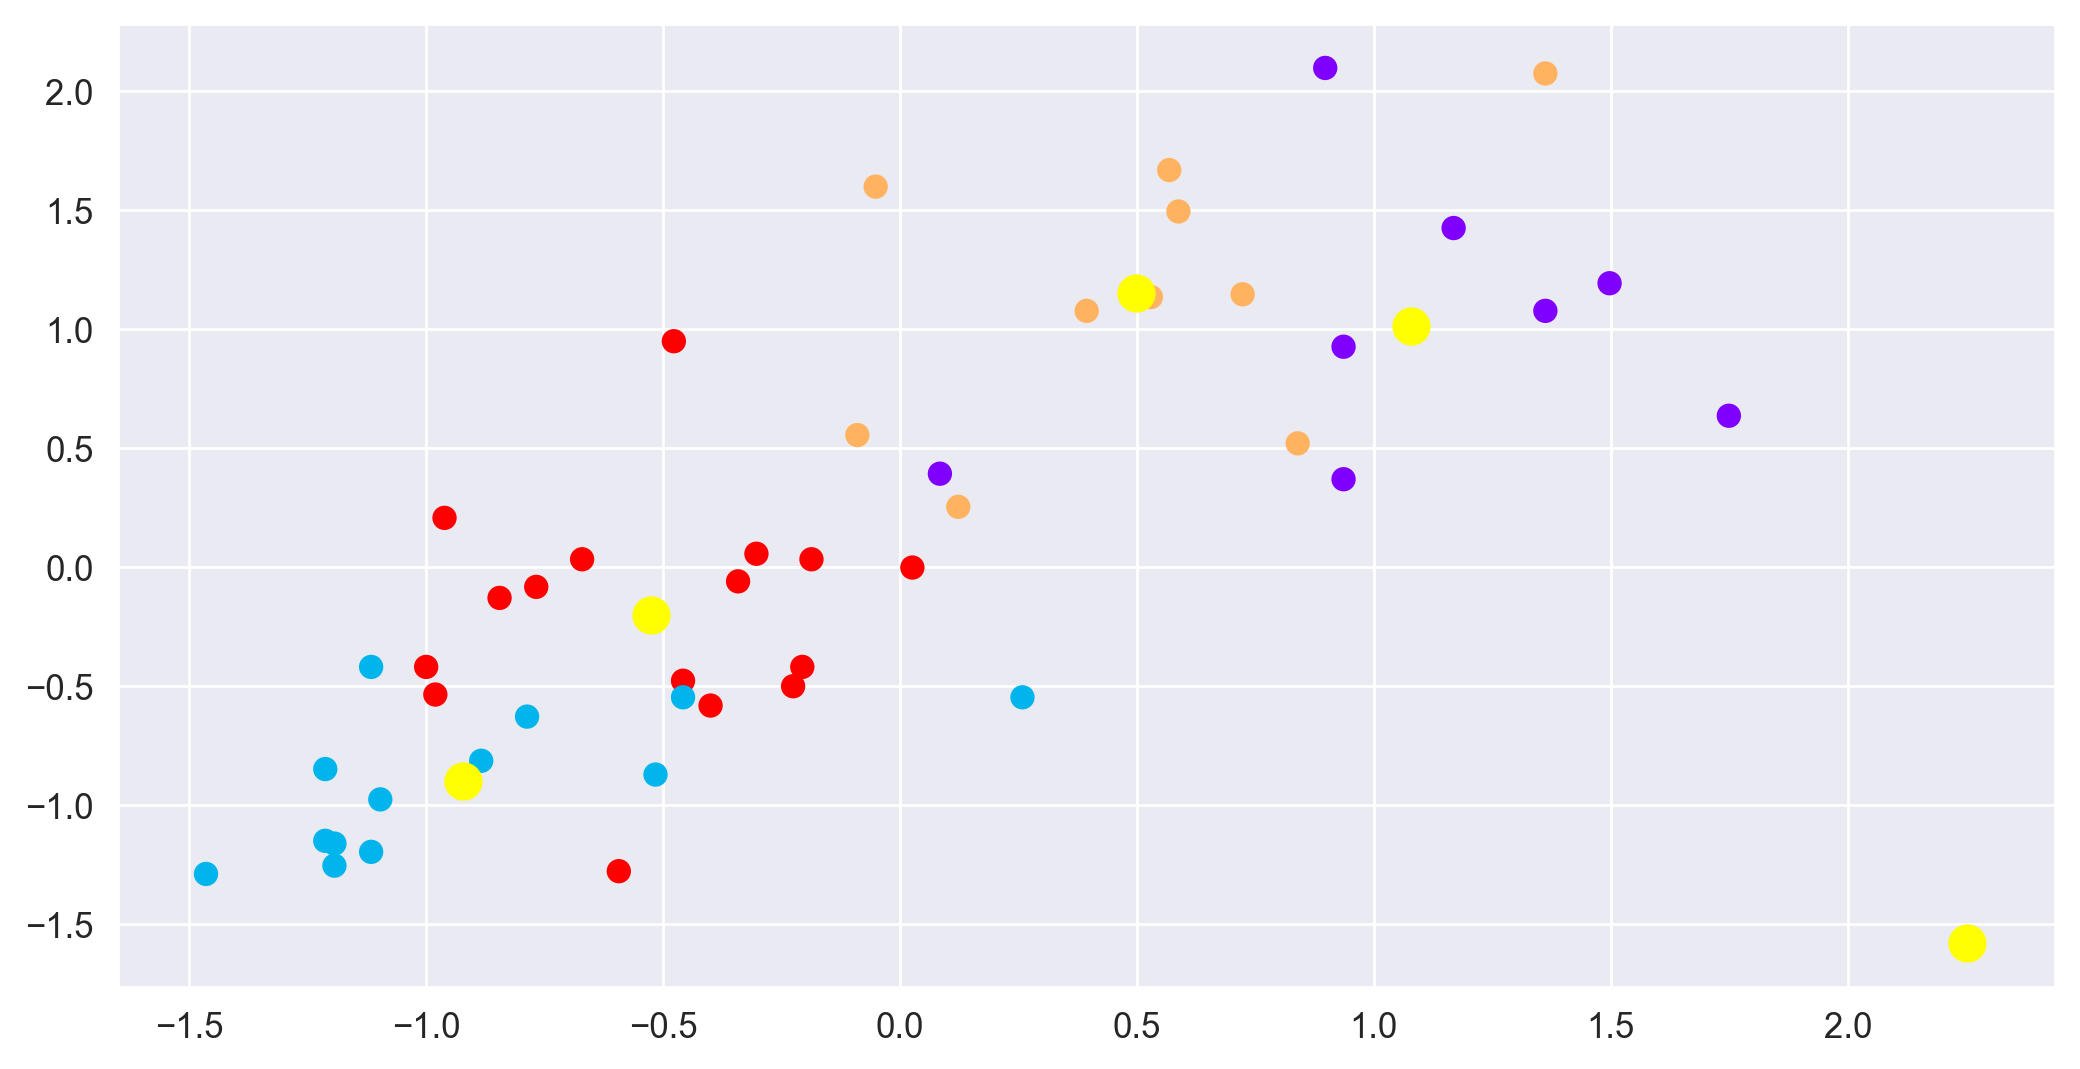

In [32]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',s=100)

In [33]:
silhouette_score(x,ypred)

0.37482712929185547

In [34]:
df['Cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,0
Alaska,20.0,20,20,20.0,2
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,0
California,20.0,20,20,20.0,2
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,4
Delaware,5.9,238,72,15.8,4
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,0


In [35]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,13.93750,243.625000,53.750000,21.412500
1,3.60000,78.538462,52.076923,12.176923
2,20.00000,20.000000,20.000000,20.000000
3,10.94000,255.500000,76.800000,30.040000
4,5.65625,138.875000,73.875000,18.781250


## Building DBSCAN Clustering Model

In [36]:
db = DBSCAN(eps=2,min_samples=3)
ypred = db.fit_predict(x)
ypred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

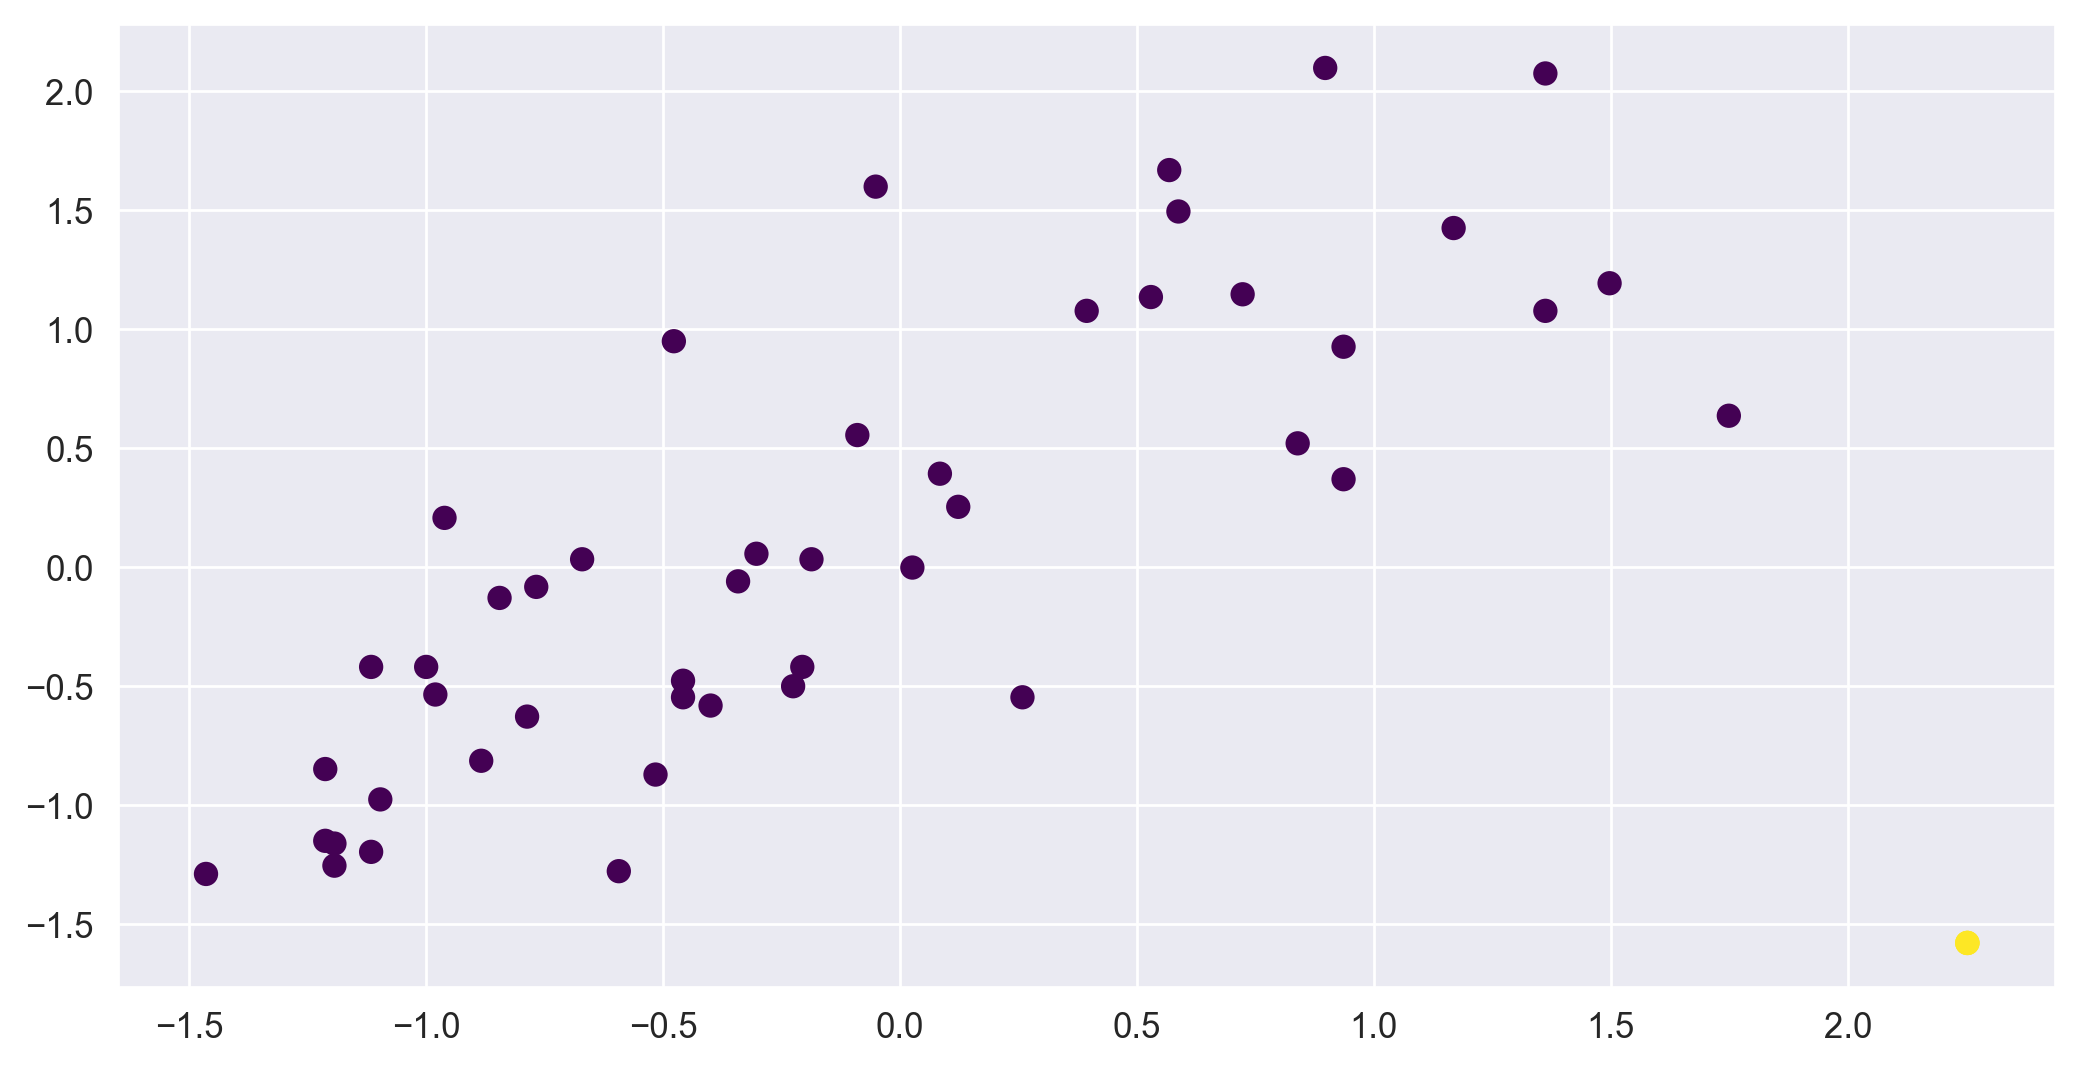

In [37]:
plt.scatter(x[:,0],x[:,1],c = ypred,cmap='viridis')

In [38]:
db_score = silhouette_score(x,ypred)

In [39]:
df['Cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,0
Alaska,20.0,20,20,20.0,1
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,20.0,20,20,20.0,1
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,0


In [40]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,7.621277,164.829787,65.042553,19.797872
1,20.000000,20.000000,20.000000,20.000000


In [41]:
df[df['Cluster']==-0]

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,0
Hawaii,5.3,46,83,20.2,0
Idaho,2.6,120,54,14.2,0


In [42]:
df[df['Cluster']==1]

,Murder,Assault,UrbanPop,Rape,Cluster
Alaska,20.0,20,20,20.0,1
California,20.0,20,20,20.0,1
Nevada,20.0,20,20,20.0,1


In [43]:
scores = pd.DataFrame([hc_score,km_score,db_score],['Hierarchy Clustering',"KMeans Clustering","DBSCAN Clustering"])
scores

,0
Hierarchy Clustering,0.429830
KMeans Clustering,0.363457
DBSCAN Clustering,0.467341
